# 注意力机制
在生物学上，在一个相同颜色的环境下出现了一个颜色鲜艳的物体，人们偏向于目光转向那个特别的物体。  
![由于突出性的非自主性提示（红杯子），注意力不自主地指向了咖啡杯](./img/eye-coffee.svg)

例如上图，喝完咖啡后，神经兴奋度得到了提升，所以会转过头眼睛重新聚焦，然后看看书。

## K、Q、V--查询、键和值
自主性的和非自主性的注意力解释了人们的注意力方式。  
根据此来设计一个注意力机制的框架。  
概念介绍：在注意力背景下，自主性的提示被称为**查询**（query）。  
给定任何查询，注意力机制通过*注意力汇聚*（attention pooling）
将选择引导至*感官输入*（sensory inputs，例如中间特征表示）。
在注意力机制中，这些感官输入被称为**值**（value）。
更通俗的解释，每个值都与一个**键**（key）配对，
这可以想象为感官输入的非自主提示。

非自主注意力时--简单的使用参数化的全连接层、甚至是非参数化的池化层。  
可以通过设计注意力汇聚的方式，
便于给定的查询（自主性提示）与键（非自主性提示）进行匹配，
这将引导得出最匹配的值（感官输入）。

![注意力机制通过注意力汇聚将*查询*（自主性提示）和*键*（非自主性提示）结合在一起，实现对*值*（感官输入）的选择倾向](./img/qkv.svg)

# 注意力的可视化

In [1]:
import torch
from d2l import torch as d2l

In [2]:
## 为了可视化权重，定义一个热力图函数。
def shoe_heatmap(matrices, xlabel, ylabel, titles=None ,figsize=(2,2),
                cmap = 'Reds'):
    '''显示矩阵的热力图'''
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

tensor([[[[-2.1159, -0.3640,  0.1925, -0.7411,  0.7818],
          [ 0.3823, -0.5374,  1.1829,  0.8185, -3.4040],
          [ 0.2523,  1.4759,  1.1165,  2.3540, -1.5038],
          [ 0.6869, -1.4409, -0.7841, -0.3684, -0.1983],
          [ 1.2303,  0.1477,  0.0599,  0.6470, -1.3764]]]])

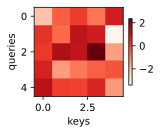

In [3]:
attention_weights = torch.randn(25).reshape(1, 1, 5, 5)
shoe_heatmap(attention_weights, xlabel='keys', ylabel='queries')
attention_weights

tensor([[[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]]])

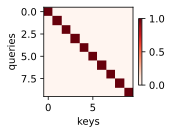

In [4]:
attention_weights = torch.eye(10).reshape(1, 1, 10, 10)
shoe_heatmap(attention_weights, xlabel='keys', ylabel='queries')
attention_weights